Path: /home/thjo/Datasets/autoSchenk/20230609_161829_0.jpg
img0: (1920, 1440, 3)
img: torch.Size([1, 3, 416, 416])
[[          0     0.49132     0.56979     0.97986     0.69062]
 [          1     0.46944      0.4849     0.24028    0.070833]]


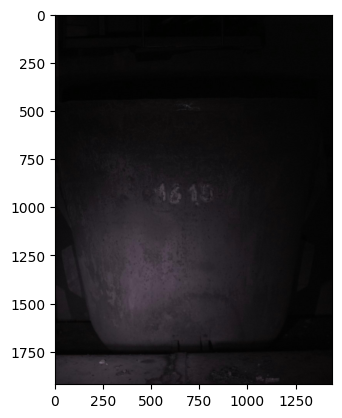

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ultralytics.yolo.utils.ops import xywh2xyxy, xyxy2xywh
from tools.boliden_utils import get_cut_out
from tools.StreamLoader import LoadImages
from PIL import Image
path = "/home/thjo/Datasets/autoSchenk/20230609_161829_0.jpg"
loader = LoadImages(path, imgsz=416)
path, img0, img, _ = next(iter(loader))
path = path[0]
print(f"Path: {path}")
print(f"img0: {img0.shape}")
print(f"img: {img.shape}")
label_path = path.replace(".jpg", ".txt").replace(".png", ".txt")
labels = np.loadtxt(label_path, delimiter=" ", dtype=np.float32).reshape(-1, 5)
print(labels)
plt.imshow(img0)

In [2]:
abels = labels[labels[:, 0] == 1]
# Extract largest bbox
if len(labels):
    largest = np.argmax(labels[:, 3]*labels[:, 4])
    print(f"Area: {labels[largest, 3]*labels[largest, 4]}")
    labels = labels[largest]
    cls,*xywh = labels
    xyxy = xywh2xyxy(xywh)
    img0 = get_cut_out(img0, xyxy)
    print(cls, xyxy)

Area: 0.6767165064811707


TypeError: list indices must be integers or slices, not tuple

ValueError: zero-size array to reduction operation minimum which has no identity

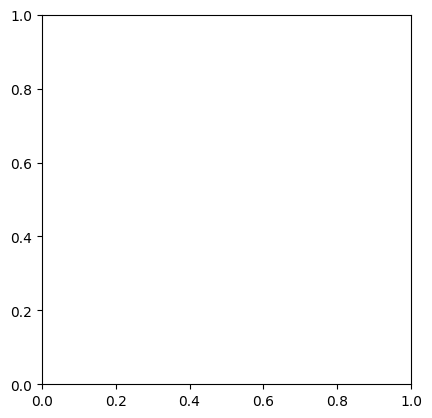

In [ ]:
plt.imshow(img0)

In [12]:
from tools.extractDetections import DataSplitter
import os

In [13]:
ds = DataSplitter(input_folder="/home/thjo/Datasets/BolidenSchenk/all/", output_folder="/home/thjo/Datasets/BolidenSchenk/", train=0.85, val=0.1, test=0.05)

item_3674.txt
item_844.png
item_3062.txt
item_2252.txt
item_2105.txt
item_3287.txt
item_2004.txt
item_1905.jpg
item_2636.txt
item_68.txt
item_2419.txt
item_1718.jpg
item_2952.txt
item_1786.jpg
item_3331.png
item_81.png
item_2989.txt
item_2191.txt
item_1879.txt
item_1656.txt
item_1021.txt
item_1231.png
item_2003.txt
item_2027.txt
item_2381.txt
item_2077.txt
item_1278.png
item_685.png
item_1962.txt
item_2934.png
item_2657.txt
item_1125.txt
item_2577.jpg
item_2533.txt
item_2645.txt
item_536.txt
item_1513.txt
item_2535.txt
item_2470.png
item_1747.txt
item_274.png
item_877.txt
item_3428.txt
item_2410.jpg
item_3146.jpg
item_3763.png
item_2609.txt
item_896.png
item_2705.jpg
item_3810.txt
item_658.jpg
item_1158.jpg
item_2338.txt
item_3099.png
item_1571.png
item_976.txt
item_2333.jpg
item_826.txt
item_1391.txt
item_369.jpg
item_1650.txt
item_630.jpg
item_1938.txt
item_1985.jpg
item_1540.jpg
item_1931.txt
item_2623.jpg
item_1597.txt
item_660.jpg
item_1801.jpg
item_2656.txt
item_3052.png
item_155

In [14]:
ds.create_folders()
ds.split_data()

Splitting 1592 images into train, val and test set...
Train: 1353, Val: 159, Test: 80
Copying data to: /home/thjo/Datasets/BolidenSchenk/train


ValueError: fmt has wrong number of % formats:  %d %f %f %f %f

In [6]:
len(os.listdir("/home/thjo/Datasets/BolidenDigits/manualDigits/"))

881

In [4]:

files = os.listdir("/home/thjo/Datasets/BolidenDigits/manualDigits/")
for file in files:
    if file.startswith("_"):
        os.remove(os.path.join("/home/thjo/Datasets/BolidenDigits/manualDigits/", file))

In [4]:
import os
import shutil

source_directories = ["train", "val", "test"]
destination_directory = os.path.join("/home/thjo/Datasets/BolidenSchenk/", "all")
os.makedirs(destination_directory, exist_ok=True)
for directory in source_directories:
    directory = os.path.join("/home/thjo/Datasets/BolidenSchenk/", directory)
    files = os.listdir(directory)
    for file in files:
        source = os.path.join(directory, file)
        destination = os.path.join(destination_directory, file)
        shutil.move(source, destination)

In [15]:
import os
import re

directory = "/home/thjo/Datasets/BolidenSchenk/train/"  # Replace with the actual directory path

files = os.listdir(directory)
for file in files:
    file_path = os.path.join(directory, file)
    base_name, extension = os.path.splitext(file_path)

    # Extract numeric parts from the base name using regular expressions
    numeric_parts = re.findall(r'[\d-]+', base_name)
    new_file_path = "item_"+''.join(numeric_parts) + extension
    # print(new_file_path)
    os.rename(file_path, os.path.join(directory, new_file_path))
# Check if all file image files have a corresponding label file
for file in files:
    file_path = os.path.join(directory, file)
    base_name, extension = os.path.splitext(file_path)
    if extension not in [".jpg", ".png"]:
        continue

    label_path = base_name + ".txt"
    # print(label_path)
    if not os.path.exists(label_path):
        print(f"Label file {label_path} does not exist!")

Label file /home/thjo/Datasets/BolidenSchenk/train/item_1231_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_3146_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_1718_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_3331_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_81_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_2470_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_2577_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_274_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_1278_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_685_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_1905_epitaxial.txt does not exist!
Lab

In [10]:
import os

directory = "/home/thjo/Datasets/BolidenSchenk/all/"  # Replace with the actual directory path

files = os.listdir(directory)
for index, file in enumerate(files):
    file_path = os.path.join(directory, file)
    base_name, extension = os.path.splitext(file_path)
    if extension not in [".jpg", ".png"]:
        continue

    label_path = base_name + ".txt"
    if not os.path.exists(label_path):
        print(f"Label file {label_path} does not exist!")
        continue

    new_base_name = f"item_{index + 1}"
    new_file_path = os.path.join(directory, new_base_name + extension)
    new_label_path = os.path.join(directory, new_base_name + ".txt")

    os.rename(file_path, new_file_path)
    os.rename(label_path, new_label_path)


In [11]:
files = os.listdir(directory)
for file in files:
    file_path = os.path.join(directory, file)
    base_name, extension = os.path.splitext(file_path)
    if extension not in [".jpg", ".png"]:
        continue

    label_path = base_name + ".txt"
    # print(label_path)
    if not os.path.exists(label_path):
        print(f"Label file {label_path} does not exist!")